In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, precision_score, accuracy_score, precision_recall_curve, auc,
                             roc_curve, roc_auc_score, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support, average_precision_score)
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, GridSearchCV
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from imblearn.pipeline import Pipeline
import time
import random
import sklearn.metrics as metrics
import scipy
from xgboost import XGBClassifier

# Load data

In [2]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [3]:
#Error: feature_names must be string, and may not contain [, ] or <
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
train_data.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in train_data.columns.values]
test_data.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in test_data.columns.values]

In [4]:
train_data.columns

Index(['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       ...
       'Sex_Education_Marriage_232', 'Sex_Education_Marriage_233',
       'Sex_Education_Marriage_241', 'Sex_Education_Marriage_242',
       'Sex_Education_Marriage_243', 'Age_category_29 - 34',
       'Age_category_35 - 41', 'Age_category__=28', 'Age_category_>41',
       'default.payment.next.month'],
      dtype='object', length=147)

# Separate data into features and targets

In [5]:
X_train=train_data.drop('default.payment.next.month', axis=1)
X_test=test_data.drop('default.payment.next.month', axis=1)
y_train=train_data['default.payment.next.month']
y_test=test_data['default.payment.next.month']

In [6]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

### 1. Random Forest

In [9]:
# tune parameter
rf_tune = RandomForestClassifier(random_state=0)
param_dist = {"n_estimators": [25, 50, 100],
              "max_features": [3,5,7,'auto'],          
              "min_samples_split": [2,5,7],                  
              "criterion": ["gini", "entropy"]}           
grid_search_rf = GridSearchCV(rf_tune, param_grid=param_dist, cv=5, scoring = 'accuracy', verbose=10)
grid_search_rf.fit(X_train, y_train)

print('best parameters:',grid_search_rf.best_estimator_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5; 1/72] START criterion=gini, max_features=3, min_samples_split=2, n_estimators=25
[CV 1/5; 1/72] END criterion=gini, max_features=3, min_samples_split=2, n_estimators=25; total time=   0.9s
[CV 2/5; 1/72] START criterion=gini, max_features=3, min_samples_split=2, n_estimators=25
[CV 2/5; 1/72] END criterion=gini, max_features=3, min_samples_split=2, n_estimators=25; total time=   1.0s
[CV 3/5; 1/72] START criterion=gini, max_features=3, min_samples_split=2, n_estimators=25
[CV 3/5; 1/72] END criterion=gini, max_features=3, min_samples_split=2, n_estimators=25; total time=   0.9s
[CV 4/5; 1/72] START criterion=gini, max_features=3, min_samples_split=2, n_estimators=25
[CV 4/5; 1/72] END criterion=gini, max_features=3, min_samples_split=2, n_estimators=25; total time=   0.9s
[CV 5/5; 1/72] START criterion=gini, max_features=3, min_samples_split=2, n_estimators=25
[CV 5/5; 1/72] END criterion=gini, max_features=3, min_s

[CV 2/5; 9/72] END criterion=gini, max_features=3, min_samples_split=7, n_estimators=100; total time=   3.5s
[CV 3/5; 9/72] START criterion=gini, max_features=3, min_samples_split=7, n_estimators=100
[CV 3/5; 9/72] END criterion=gini, max_features=3, min_samples_split=7, n_estimators=100; total time=   3.5s
[CV 4/5; 9/72] START criterion=gini, max_features=3, min_samples_split=7, n_estimators=100
[CV 4/5; 9/72] END criterion=gini, max_features=3, min_samples_split=7, n_estimators=100; total time=   3.5s
[CV 5/5; 9/72] START criterion=gini, max_features=3, min_samples_split=7, n_estimators=100
[CV 5/5; 9/72] END criterion=gini, max_features=3, min_samples_split=7, n_estimators=100; total time=   3.4s
[CV 1/5; 10/72] START criterion=gini, max_features=5, min_samples_split=2, n_estimators=25
[CV 1/5; 10/72] END criterion=gini, max_features=5, min_samples_split=2, n_estimators=25; total time=   1.0s
[CV 2/5; 10/72] START criterion=gini, max_features=5, min_samples_split=2, n_estimators=25


[CV 3/5; 17/72] END criterion=gini, max_features=5, min_samples_split=7, n_estimators=50; total time=   2.1s
[CV 4/5; 17/72] START criterion=gini, max_features=5, min_samples_split=7, n_estimators=50
[CV 4/5; 17/72] END criterion=gini, max_features=5, min_samples_split=7, n_estimators=50; total time=   2.6s
[CV 5/5; 17/72] START criterion=gini, max_features=5, min_samples_split=7, n_estimators=50
[CV 5/5; 17/72] END criterion=gini, max_features=5, min_samples_split=7, n_estimators=50; total time=   2.2s
[CV 1/5; 18/72] START criterion=gini, max_features=5, min_samples_split=7, n_estimators=100
[CV 1/5; 18/72] END criterion=gini, max_features=5, min_samples_split=7, n_estimators=100; total time=   4.6s
[CV 2/5; 18/72] START criterion=gini, max_features=5, min_samples_split=7, n_estimators=100
[CV 2/5; 18/72] END criterion=gini, max_features=5, min_samples_split=7, n_estimators=100; total time=   4.2s
[CV 3/5; 18/72] START criterion=gini, max_features=5, min_samples_split=7, n_estimators

[CV 4/5; 25/72] END criterion=gini, max_features=7, min_samples_split=7, n_estimators=25; total time=   1.2s
[CV 5/5; 25/72] START criterion=gini, max_features=7, min_samples_split=7, n_estimators=25
[CV 5/5; 25/72] END criterion=gini, max_features=7, min_samples_split=7, n_estimators=25; total time=   1.3s
[CV 1/5; 26/72] START criterion=gini, max_features=7, min_samples_split=7, n_estimators=50
[CV 1/5; 26/72] END criterion=gini, max_features=7, min_samples_split=7, n_estimators=50; total time=   2.6s
[CV 2/5; 26/72] START criterion=gini, max_features=7, min_samples_split=7, n_estimators=50
[CV 2/5; 26/72] END criterion=gini, max_features=7, min_samples_split=7, n_estimators=50; total time=   2.4s
[CV 3/5; 26/72] START criterion=gini, max_features=7, min_samples_split=7, n_estimators=50
[CV 3/5; 26/72] END criterion=gini, max_features=7, min_samples_split=7, n_estimators=50; total time=   2.5s
[CV 4/5; 26/72] START criterion=gini, max_features=7, min_samples_split=7, n_estimators=50


[CV 4/5; 33/72] END criterion=gini, max_features=auto, min_samples_split=5, n_estimators=100; total time=   7.0s
[CV 5/5; 33/72] START criterion=gini, max_features=auto, min_samples_split=5, n_estimators=100
[CV 5/5; 33/72] END criterion=gini, max_features=auto, min_samples_split=5, n_estimators=100; total time=   7.0s
[CV 1/5; 34/72] START criterion=gini, max_features=auto, min_samples_split=7, n_estimators=25
[CV 1/5; 34/72] END criterion=gini, max_features=auto, min_samples_split=7, n_estimators=25; total time=   1.7s
[CV 2/5; 34/72] START criterion=gini, max_features=auto, min_samples_split=7, n_estimators=25
[CV 2/5; 34/72] END criterion=gini, max_features=auto, min_samples_split=7, n_estimators=25; total time=   1.7s
[CV 3/5; 34/72] START criterion=gini, max_features=auto, min_samples_split=7, n_estimators=25
[CV 3/5; 34/72] END criterion=gini, max_features=auto, min_samples_split=7, n_estimators=25; total time=   1.6s
[CV 4/5; 34/72] START criterion=gini, max_features=auto, min_

[CV 4/5; 41/72] END criterion=entropy, max_features=3, min_samples_split=5, n_estimators=50; total time=   2.2s
[CV 5/5; 41/72] START criterion=entropy, max_features=3, min_samples_split=5, n_estimators=50
[CV 5/5; 41/72] END criterion=entropy, max_features=3, min_samples_split=5, n_estimators=50; total time=   2.2s
[CV 1/5; 42/72] START criterion=entropy, max_features=3, min_samples_split=5, n_estimators=100
[CV 1/5; 42/72] END criterion=entropy, max_features=3, min_samples_split=5, n_estimators=100; total time=   4.5s
[CV 2/5; 42/72] START criterion=entropy, max_features=3, min_samples_split=5, n_estimators=100
[CV 2/5; 42/72] END criterion=entropy, max_features=3, min_samples_split=5, n_estimators=100; total time=   4.4s
[CV 3/5; 42/72] START criterion=entropy, max_features=3, min_samples_split=5, n_estimators=100
[CV 3/5; 42/72] END criterion=entropy, max_features=3, min_samples_split=5, n_estimators=100; total time=   4.4s
[CV 4/5; 42/72] START criterion=entropy, max_features=3, m

[CV 4/5; 49/72] END criterion=entropy, max_features=5, min_samples_split=5, n_estimators=25; total time=   1.4s
[CV 5/5; 49/72] START criterion=entropy, max_features=5, min_samples_split=5, n_estimators=25
[CV 5/5; 49/72] END criterion=entropy, max_features=5, min_samples_split=5, n_estimators=25; total time=   1.4s
[CV 1/5; 50/72] START criterion=entropy, max_features=5, min_samples_split=5, n_estimators=50
[CV 1/5; 50/72] END criterion=entropy, max_features=5, min_samples_split=5, n_estimators=50; total time=   2.7s
[CV 2/5; 50/72] START criterion=entropy, max_features=5, min_samples_split=5, n_estimators=50
[CV 2/5; 50/72] END criterion=entropy, max_features=5, min_samples_split=5, n_estimators=50; total time=   2.4s
[CV 3/5; 50/72] START criterion=entropy, max_features=5, min_samples_split=5, n_estimators=50
[CV 3/5; 50/72] END criterion=entropy, max_features=5, min_samples_split=5, n_estimators=50; total time=   2.5s
[CV 4/5; 50/72] START criterion=entropy, max_features=5, min_sam

[CV 4/5; 57/72] END criterion=entropy, max_features=7, min_samples_split=2, n_estimators=100; total time=   6.8s
[CV 5/5; 57/72] START criterion=entropy, max_features=7, min_samples_split=2, n_estimators=100
[CV 5/5; 57/72] END criterion=entropy, max_features=7, min_samples_split=2, n_estimators=100; total time=   6.7s
[CV 1/5; 58/72] START criterion=entropy, max_features=7, min_samples_split=5, n_estimators=25
[CV 1/5; 58/72] END criterion=entropy, max_features=7, min_samples_split=5, n_estimators=25; total time=   1.5s
[CV 2/5; 58/72] START criterion=entropy, max_features=7, min_samples_split=5, n_estimators=25
[CV 2/5; 58/72] END criterion=entropy, max_features=7, min_samples_split=5, n_estimators=25; total time=   1.6s
[CV 3/5; 58/72] START criterion=entropy, max_features=7, min_samples_split=5, n_estimators=25
[CV 3/5; 58/72] END criterion=entropy, max_features=7, min_samples_split=5, n_estimators=25; total time=   1.6s
[CV 4/5; 58/72] START criterion=entropy, max_features=7, min_

[CV 4/5; 65/72] END criterion=entropy, max_features=auto, min_samples_split=2, n_estimators=50; total time=   4.5s
[CV 5/5; 65/72] START criterion=entropy, max_features=auto, min_samples_split=2, n_estimators=50
[CV 5/5; 65/72] END criterion=entropy, max_features=auto, min_samples_split=2, n_estimators=50; total time=   4.5s
[CV 1/5; 66/72] START criterion=entropy, max_features=auto, min_samples_split=2, n_estimators=100
[CV 1/5; 66/72] END criterion=entropy, max_features=auto, min_samples_split=2, n_estimators=100; total time=   9.0s
[CV 2/5; 66/72] START criterion=entropy, max_features=auto, min_samples_split=2, n_estimators=100
[CV 2/5; 66/72] END criterion=entropy, max_features=auto, min_samples_split=2, n_estimators=100; total time=  12.4s
[CV 3/5; 66/72] START criterion=entropy, max_features=auto, min_samples_split=2, n_estimators=100
[CV 3/5; 66/72] END criterion=entropy, max_features=auto, min_samples_split=2, n_estimators=100; total time=  10.3s
[CV 4/5; 66/72] START criterion

### Print best hyperparameters of Random Forest

In [33]:
grid_search_rf.best_params_['n_estimators']

100

In [34]:
grid_search_rf.best_params_['max_features']

3

In [35]:
grid_search_rf.best_params_['min_samples_split']

2

In [36]:
grid_search_rf.best_params_['criterion']

'gini'

## Get test accuracy score

In [30]:
# predict on test set
rf = grid_search_rf.best_estimator_
predict = rf.predict(X_test)
rf_acc = metrics.accuracy_score(y_test, predict)
rf_acc

0.7851666666666667

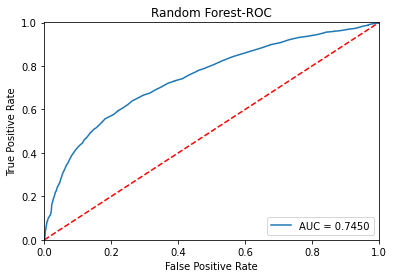

In [11]:
# AUC on external test set
y_pred_rf = grid_search_rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_rf)
roc_auc = auc(fpr, tpr)

plt.title('Random Forest-ROC')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Get feature importance plot for Random Forest

<AxesSubplot:>

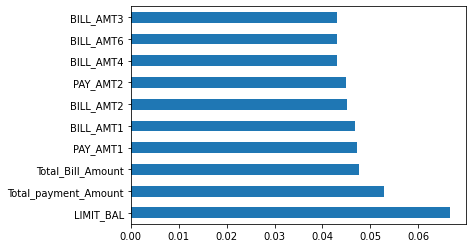

In [12]:
feat_importances = pd.Series(grid_search_rf.best_estimator_.feature_importances_, X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [14]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4673
           1       0.52      0.47      0.49      1327

    accuracy                           0.79      6000
   macro avg       0.68      0.67      0.68      6000
weighted avg       0.78      0.79      0.78      6000



### 2. XGBoost

In [21]:
parameters = {"n_estimators": [75, 100, 125, 150],
                    "learning_rate": [1, 0.3, 0.1],
                    "max_depth": [5,6,7]}

model_xgb = XGBClassifier(eta= 0.1, gamma= 0.1, max_depth = 5, min_child_weight = 2, n_estimators = 100, subsample = 1, seed=0, objective='binary:logistic')
model_xgb = GridSearchCV(model_xgb, parameters, cv=5, scoring='accuracy', verbose=10)
model_xgb.fit(X_train, y_train)

print(f'The best parameters are: {model_xgb.best_params_}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START learning_rate=1, max_depth=5, n_estimators=75..............
[CV 1/5; 1/36] END learning_rate=1, max_depth=5, n_estimators=75; total time=   7.8s
[CV 2/5; 1/36] START learning_rate=1, max_depth=5, n_estimators=75..............
[CV 2/5; 1/36] END learning_rate=1, max_depth=5, n_estimators=75; total time=   7.8s
[CV 3/5; 1/36] START learning_rate=1, max_depth=5, n_estimators=75..............
[CV 3/5; 1/36] END learning_rate=1, max_depth=5, n_estimators=75; total time=   8.3s
[CV 4/5; 1/36] START learning_rate=1, max_depth=5, n_estimators=75..............
[CV 4/5; 1/36] END learning_rate=1, max_depth=5, n_estimators=75; total time=   9.5s
[CV 5/5; 1/36] START learning_rate=1, max_depth=5, n_estimators=75..............
[CV 5/5; 1/36] END learning_rate=1, max_depth=5, n_estimators=75; total time=  10.4s
[CV 1/5; 2/36] START learning_rate=1, max_depth=5, n_estimators=100.............
[CV 1/5; 2/36] END learning

[CV 5/5; 10/36] END learning_rate=1, max_depth=7, n_estimators=100; total time=  16.4s
[CV 1/5; 11/36] START learning_rate=1, max_depth=7, n_estimators=125............
[CV 1/5; 11/36] END learning_rate=1, max_depth=7, n_estimators=125; total time=  21.0s
[CV 2/5; 11/36] START learning_rate=1, max_depth=7, n_estimators=125............
[CV 2/5; 11/36] END learning_rate=1, max_depth=7, n_estimators=125; total time=  21.4s
[CV 3/5; 11/36] START learning_rate=1, max_depth=7, n_estimators=125............
[CV 3/5; 11/36] END learning_rate=1, max_depth=7, n_estimators=125; total time=  20.1s
[CV 4/5; 11/36] START learning_rate=1, max_depth=7, n_estimators=125............
[CV 4/5; 11/36] END learning_rate=1, max_depth=7, n_estimators=125; total time=  19.6s
[CV 5/5; 11/36] START learning_rate=1, max_depth=7, n_estimators=125............
[CV 5/5; 11/36] END learning_rate=1, max_depth=7, n_estimators=125; total time=  20.8s
[CV 1/5; 12/36] START learning_rate=1, max_depth=7, n_estimators=150.....

[CV 4/5; 20/36] END learning_rate=0.3, max_depth=6, n_estimators=150; total time=  19.8s
[CV 5/5; 20/36] START learning_rate=0.3, max_depth=6, n_estimators=150..........
[CV 5/5; 20/36] END learning_rate=0.3, max_depth=6, n_estimators=150; total time=  19.8s
[CV 1/5; 21/36] START learning_rate=0.3, max_depth=7, n_estimators=75...........
[CV 1/5; 21/36] END learning_rate=0.3, max_depth=7, n_estimators=75; total time=  11.9s
[CV 2/5; 21/36] START learning_rate=0.3, max_depth=7, n_estimators=75...........
[CV 2/5; 21/36] END learning_rate=0.3, max_depth=7, n_estimators=75; total time=  12.4s
[CV 3/5; 21/36] START learning_rate=0.3, max_depth=7, n_estimators=75...........
[CV 3/5; 21/36] END learning_rate=0.3, max_depth=7, n_estimators=75; total time=  12.2s
[CV 4/5; 21/36] START learning_rate=0.3, max_depth=7, n_estimators=75...........
[CV 4/5; 21/36] END learning_rate=0.3, max_depth=7, n_estimators=75; total time=  12.8s
[CV 5/5; 21/36] START learning_rate=0.3, max_depth=7, n_estimator

[CV 3/5; 30/36] END learning_rate=0.1, max_depth=6, n_estimators=100; total time=  13.3s
[CV 4/5; 30/36] START learning_rate=0.1, max_depth=6, n_estimators=100..........
[CV 4/5; 30/36] END learning_rate=0.1, max_depth=6, n_estimators=100; total time=  13.4s
[CV 5/5; 30/36] START learning_rate=0.1, max_depth=6, n_estimators=100..........
[CV 5/5; 30/36] END learning_rate=0.1, max_depth=6, n_estimators=100; total time=  13.5s
[CV 1/5; 31/36] START learning_rate=0.1, max_depth=6, n_estimators=125..........
[CV 1/5; 31/36] END learning_rate=0.1, max_depth=6, n_estimators=125; total time=  17.5s
[CV 2/5; 31/36] START learning_rate=0.1, max_depth=6, n_estimators=125..........
[CV 2/5; 31/36] END learning_rate=0.1, max_depth=6, n_estimators=125; total time=  16.9s
[CV 3/5; 31/36] START learning_rate=0.1, max_depth=6, n_estimators=125..........
[CV 3/5; 31/36] END learning_rate=0.1, max_depth=6, n_estimators=125; total time=  16.7s
[CV 4/5; 31/36] START learning_rate=0.1, max_depth=6, n_estim

In [22]:
best_clf = model_xgb.best_estimator_
best_clf.fit(X_train, y_train)
y_pred_best = best_clf.predict(X_test)
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4673
           1       0.53      0.43      0.48      1327

    accuracy                           0.79      6000
   macro avg       0.69      0.66      0.67      6000
weighted avg       0.78      0.79      0.78      6000



### 3. Logistic Regression

In [23]:
# Grid search CV for Logistic Regression

# Start time
start = time.time()

# Define random state
random.seed(0)

lgr_clf = LogisticRegression(C=1.0, random_state=1, n_jobs=-1)

param_grid = {
    'penalty' : ['l2', 'elasticnet', 'l1'], 
    'C' : [1.0, 0.5, 0.1, 0.05]
    }

gs_lgr = GridSearchCV(lgr_clf, param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=1) #scoring can be 'f1' too
gs_lgr.fit(X_train, y_train)

print(f"Time taken: {time.time()-start} seconds")

# Get the best tuned models and print out the best f1 score within each model
print(f"\nBest model for Logistic Regression: \n{gs_lgr.best_estimator_}\n")
print(f"Best cross-validation score for Logistic Regression: {gs_lgr.best_score_}\n")

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\chenx\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [0.57153192        nan        nan 0.57153192        nan        nan
 0.57153192        nan        nan 0.57150517        nan        nan]
  category=UserWarning


Time taken: 22.813864707946777 seconds

Best model for Logistic Regression: 
LogisticRegression(C=0.5, n_jobs=-1, random_state=1)

Best cross-validation score for Logistic Regression: 0.5715319238674007



In [37]:
gs_lgr.best_params_['penalty'] # Check penalty algorithm hyperparameter of best model

'l2'

In [26]:
# Fit the best Logistic Regression classifier
best_lgr_clf = LogisticRegression(C=gs_lgr.best_params_['C'], penalty=gs_lgr.best_params_['penalty'], n_jobs=-1)

y_pred_lgr = best_lgr_clf.fit(X_train, y_train).predict(X_test)
print(f"Classification report for best Logistic Regression model: \n{classification_report(y_test, y_pred_lgr, digits=3)}")

Classification report for best Logistic Regression model: 
              precision    recall  f1-score   support

           0      0.812     0.799     0.805      4673
           1      0.330     0.348     0.339      1327

    accuracy                          0.699      6000
   macro avg      0.571     0.573     0.572      6000
weighted avg      0.705     0.699     0.702      6000



### 4.LightGBM

In [27]:
from lightgbm import LGBMClassifier
# Grid search CV for Light GBM

# Start time
start = time.time()

# Define random state
random.seed(0)

lightgbm_clf = LGBMClassifier(objective='binary', random_state=1)

param_grid = {
    'n_estimators': [25, 50, 75, 100],
    'num_leaves' : [5, 10, 20, 25],
    'learning_rate' : [0.1, 0.05, 0.01]
    }

gs_lgbm = GridSearchCV(lightgbm_clf, param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=1) #scoring can be 'roc_auc' too
gs_lgbm.fit(X_train, y_train)
print(f"Time taken: {time.time()-start} seconds")

# Get the best tuned models and print out the best f1 score within each model
print(f"\nBest model for Light GBM: \n{gs_lgbm.best_estimator_}\n")
print(f"Best cross-validation score for Light GBM: {gs_lgbm.best_score_}\n")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Time taken: 42.409144163131714 seconds

Best model for Light GBM: 
LGBMClassifier(num_leaves=25, objective='binary', random_state=1)

Best cross-validation score for Light GBM: 0.8214428796194901



In [38]:
gs_lgbm.best_params_['n_estimators'] # Check hyperparameter of best model

100

In [39]:
gs_lgbm.best_params_['learning_rate'] # Check hyperparameter of best model

0.1

In [29]:
# Fit the best Light GBM classifier
best_lgbm_clf = LGBMClassifier(n_estimators=gs_lgbm.best_params_['n_estimators'], num_leaves=gs_lgbm.best_params_['num_leaves'], 
                               learning_rate=gs_lgbm.best_params_['learning_rate'], 
                               objective='binary', random_state=1)

y_pred_lgbm = best_lgbm_clf.fit(X_train, y_train).predict(X_test)
print(f"Classification report for best SVM model: \n{classification_report(y_test, y_pred_lgbm, digits=3)}")

Classification report for best SVM model: 
              precision    recall  f1-score   support

           0      0.856     0.885     0.870      4673
           1      0.539     0.475     0.505      1327

    accuracy                          0.794      6000
   macro avg      0.698     0.680     0.688      6000
weighted avg      0.786     0.794     0.789      6000



# End